<a href="https://colab.research.google.com/github/FerdousJUST/Fish-Classification-model-in-cnn-2022__final-/blob/main/Fish_Image_Classification_My_Model02_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import imageio
import pathlib
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
import numpy as np
from glob import glob
from tensorflow.keras.layers import Input,Flatten,Dense,BatchNormalization,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [128,128]

train_path = '/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training'
valid_path = '/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Validation'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (128,128),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (128,128),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4800 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.


In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,padding='same', strides=(1, 1),dilation_rate=(1, 1),
                                    kernel_size=(3,3),activation = 'relu',input_shape = (128,128,3)),
                                    tf.keras.layers.MaxPool2D(2,2), 
                                   
                                    
                                    tf.keras.layers.Conv2D(64,padding='same',strides=(1, 1),dilation_rate=(1, 1),
                                    kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                 

                                    tf.keras.layers.Conv2D(128,padding='same',strides=(1, 1),dilation_rate=(1, 1),
                                    kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                   

                                    tf.keras.layers.Conv2D(256,padding='same',strides=(1, 1),dilation_rate=(1, 1),
                                    kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                  

                                    tf.keras.layers.Conv2D(512,padding='same',strides=(1, 1),dilation_rate=(1, 1),
                                    kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                                                                                    
                                    tf.keras.layers.Flatten(),

                                    tf.keras.layers.Dense(256,activation = 'relu'),
                                    tf.keras.layers.Dropout(0.2),                               

                                    tf.keras.layers.Dense(4,activation = 'softmax')
                                    ])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 128)     

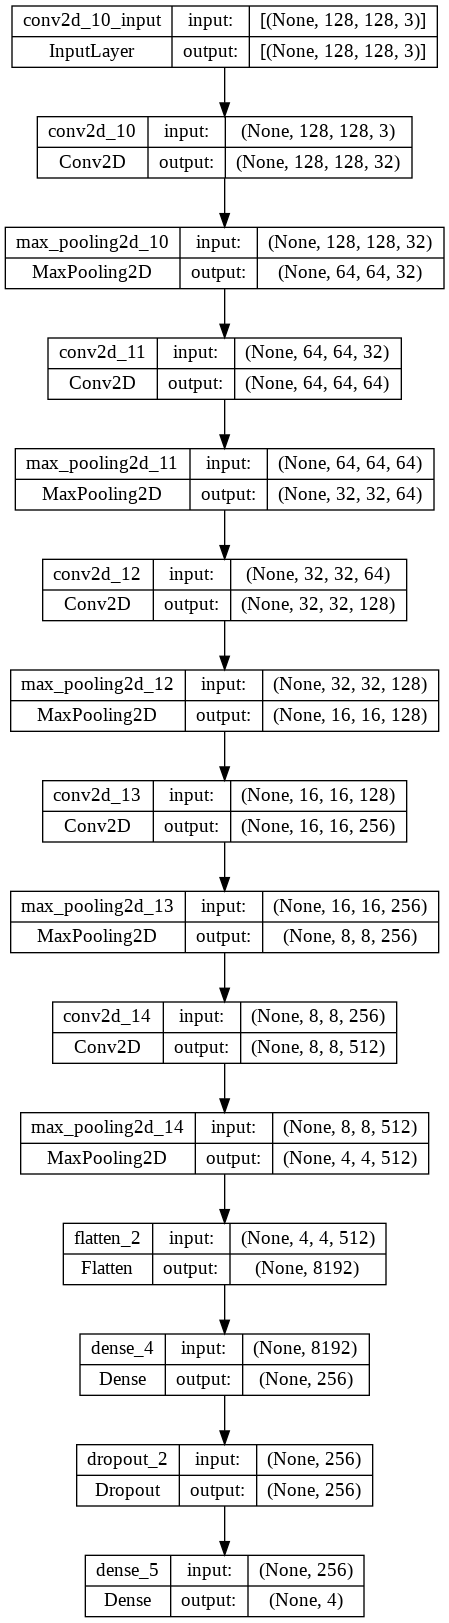

In [ ]:
plot_model(model = model,show_shapes = True)

In [ ]:
import tensorflow as tf

from keras.models import load_model

model.save('/content/drive/Shareddrives/Research Collaboration/Ferdous MSc Project/part eight/my_model_02_test.h5')

In [ ]:
from tensorflow.keras.optimizers import Adam
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss = 'categorical_crossentropy',
              #optimizer = 'Adam',
              optimizer = opt,
              metrics = ['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
import h5py

In [ ]:
erl_stop = EarlyStopping(monitor = 'val_loss',patience = 3,restore_best_weights=True)
mod_chk = ModelCheckpoint(
    filepath='/content/drive/Shareddrives/Research Collaboration/Ferdous MSc Project/part eight/my_model_02_test(1).hdf5',
                          monitor = 'val_loss',save_best_only = True)
lr_rate = ReduceLROnPlateau(monitor = 'val_loss',patience = 3,factor = 0.1)

In [ ]:
hist = model.fit_generator(training_set, shuffle = True, epochs=20, validation_data=test_set,
                           callbacks = [erl_stop,mod_chk,lr_rate],verbose = 2,
                          # steps_per_epoch=len(training_set),
                            #validation_steps=len(test_set)
                           )

<ipython-input-28-17ae8710432a>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(training_set, shuffle = True, epochs=20, validation_data=test_set,


Epoch 1/20
150/150 - 51s - loss: 1.0934 - accuracy: 0.4694 - val_loss: 1.1105 - val_accuracy: 0.5283 - lr: 1.0000e-04 - 51s/epoch - 342ms/step
Epoch 2/20
150/150 - 50s - loss: 0.7190 - accuracy: 0.6969 - val_loss: 0.9457 - val_accuracy: 0.6258 - lr: 1.0000e-04 - 50s/epoch - 331ms/step
Epoch 3/20
150/150 - 50s - loss: 0.5321 - accuracy: 0.7998 - val_loss: 0.6877 - val_accuracy: 0.7550 - lr: 1.0000e-04 - 50s/epoch - 335ms/step
Epoch 4/20
150/150 - 49s - loss: 0.3764 - accuracy: 0.8583 - val_loss: 0.9199 - val_accuracy: 0.6875 - lr: 1.0000e-04 - 49s/epoch - 324ms/step
Epoch 5/20
150/150 - 50s - loss: 0.3133 - accuracy: 0.8865 - val_loss: 0.3938 - val_accuracy: 0.8308 - lr: 1.0000e-04 - 50s/epoch - 332ms/step
Epoch 6/20
150/150 - 49s - loss: 0.2523 - accuracy: 0.9062 - val_loss: 0.4599 - val_accuracy: 0.8292 - lr: 1.0000e-04 - 49s/epoch - 324ms/step
Epoch 7/20
150/150 - 50s - loss: 0.2146 - accuracy: 0.9187 - val_loss: 0.4150 - val_accuracy: 0.8250 - lr: 1.0000e-04 - 50s/epoch - 331ms/step

In [ ]:
acc = model.evaluate(test_set,steps = len(test_set),verbose = 2)
print('%.2f'%(acc[1]*100))

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(hist.history['loss'],'b-o',color = 'blue',label = 'train',linewidth=3.0)
plt.plot(hist.history['val_loss'],'b-o',color = 'orange',label = 'train',linewidth=3.0)
plt.grid(True)
epochs = range(1,20)
plt.legend(['Train Loss', 'Test Val_Loss'], loc='upper right')
plt.title("Train & Test Loss with Epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 16)
plt.ylabel("Train & Test Loss",fontsize =16)
plt.show()

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(hist.history['accuracy'],'b-o',color = 'blue',label = 'train',linewidth=3.0)
plt.plot(hist.history['val_accuracy'],'b-o',color = 'orange',label = 'train',linewidth=3.0)
plt.grid(True)
epochs = range(1,10)
#plt.legend(['loss', 'val_loss'], loc='upper right')
plt.legend(['Train Accuracy', 'Test Accuracy'], loc='lower right')
plt.title("Train & Test Accuracy with Epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 16)
plt.ylabel("Train & Test Accuracy",fontsize =16)
plt.show()

In [ ]:
from tensorflow.python.ops.gen_math_ops import Round
from keras.preprocessing import image
import numpy as np
from keras.utils import load_img, img_to_array
test_image = load_img(
'/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training/Tilapia_Fish/Tilapia_Fish 004.png', 
                      target_size = (128,128))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
rslt = model.predict(test_image)
print (rslt)


list_index = [0,1,2,3]

x = rslt

for i in range(4):
  for j in range(4):
    if x[0][list_index[i]] > x[0][list_index[j]]:
          temp = list_index[i]
          list_index[i] = list_index[j]
          list_index[j] = temp

print(list_index)

classification = ['Barbel_Fish','Hilsha_Fish','Spotted_Snakehead_Fish','Tilapia_Fish']
     

for i in range(4):
  print(classification[list_index[i]], ':', round(rslt[0][list_index[i]] * 100,2),'%')